# K 均值（KMeans)

首先从 sklearn 下的 cluster 中引入 KMeans，再创建估计器起名 model，设置超参数 n_cluster 为 3 (为了展示方便而我们知道用的 iris 数据集有 3 类，实际上应该选不同数量的 n_cluster，根据 elbow 图来决定，下帖细讲)。

In [1]:
from sklearn.cluster import KMeans

model = KMeans(max_iter=500, n_clusters=3 )
model

KMeans(max_iter=500, n_clusters=3)

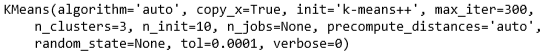

In [2]:
from sklearn import datasets

iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 拟合
model.fit(X_train)

KMeans(max_iter=500, n_clusters=3)

 KMeans 模型这几个参数：

    model.cluster_centers_：簇中心。三个簇那么有三个坐标。

    model.labels_：聚类后的标签

    model.inertia_：所有点到对应的簇中心的距离平方和 (越小越好)

In [3]:
print( model.cluster_centers_, '\n')	
print( model.labels_, '\n' )	
print( model.inertia_, '\n')	
print( iris.target )

[[6.90740741 3.06296296 5.77407407 2.01111111]
 [5.01891892 3.40540541 1.48378378 0.25405405]
 [5.83170732 2.70243902 4.35365854 1.40731707]] 

[2 2 0 2 2 0 0 0 2 2 0 1 2 1 0 1 2 1 2 1 1 2 0 0 1 1 2 1 2 0 0 2 1 2 2 0 1
 2 2 0 2 1 1 2 2 2 0 1 2 2 0 1 1 2 2 2 2 0 2 1 1 2 1 1 1 2 2 0 2 0 2 1 1 1
 1 2 2 2 0 0 0 2 0 1 1 0 0 1 2 1 0 0 1 0 1 1 0 1 1 2 1 1 2 1 2] 

57.04613052076465 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1 0 2 2 0 0 2 0 2 1 0 1 2 1 1 0 2 1 1 0 2 2 1 2 2 0 1 2 1 0 2 2 0 0 0 2 1
 2 1 2 2 2 1 2 2]
[0 2 1 1 2 2 1 2 2 0 2 0 1 0 0 2 1 0 0 2 2 1 0 1 1 2 0 2 0 1 1 2 2 2 2 1 0
 1 0 1 1 1 0 1 1]


# 层次聚类

层次聚类(Hierarchical Clustering)是聚类算法的一种，基于层次的聚类算法（Hierarchical Clustering）可以是凝聚的（Agglomerative）或者分裂的（Divisive），取决于层次的划分是“自底向上”还是“自顶向下”。
凝聚层次聚类原理是：最初将每个对象看成一个簇，然后将这些簇根据某种规则被一步步合并，就这样不断合并直到达到预设的簇类个数。这里的关键在于：如何计算聚类簇之间的距离？ 
　　计算聚类簇间距离的方法有三种，分别为Single Linkage，Complete Linkage和Average Linkage。在开始计算之前，我们先来介绍下这三种计算方法以及各自的优缺点。

    Single Linkage：方法是将两个组合数据点中距离最近的两个数据点间的距离作为这两个组合数据点的距离。这种方法容易受到极端值的影响。两个不相似的组合数据点可能由于其中的某个极端的数据点距离较近而组合在一起。
    Complete Linkage：Complete Linkage的计算方法与Single Linkage相反，将两个组合数据点中距离最远的两个数据点间的距离作为这两个组合数据点的距离。Complete Linkage的问题也与Single Linkage相反，两个不相似的组合数据点可能由于其中的极端值距离较远而无法组合在一起。
    Average Linkage：Average Linkage的计算方法是计算两个组合数据点中的每个数据点与其他所有数据点的距离。将所有距离的均值作为两个组合数据点间的距离。这种方法计算量比较大，但结果比前两种方法更合理

sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’)

主要参数

    n_clusters：聚类的个数
    affinity：affinity=’euclidean’： string or callable，计算距离的方法，可以是 “euclidean”（即 “l2”，欧氏距离），“manhattan”（即 “l1”，曼哈顿距离，有利于稀疏特征或稀疏噪声，例如文本挖掘中使用稀有词的出现作为特征时，会出现许多 0）, “cosine”（余弦距离）, ‘precomputed’（预先计算的 affinity matrix），如果 linkage=“ward”，只能选择 “euclidean”，选择度量标准的方针是使得不同类样本之间距离最大化，并且最小化同类样本之间的距离；
    memory=None： None, str or object with the joblib，如果给定一个地址，可以将层次聚类的树形图缓存到相应地址； 
    linkage：指定层次聚类判断相似度的方法，有以下三种：
                          ward：组间距离等于两类对象之间的最小距离。（即single-linkage聚类）
                          average：组间距离等于两组对象之间的平均距离。（average-linkage聚类）
                          complete：组间距离等于两组对象之间的最大距离。（complete-linkage聚类）

主要属性

    labels_： 每个数据的分类标签
    n_leaves_：分层树的叶节点数量
    n_components：连接图中连通分量的估计值
    children：一个数组，给出了每个非节点数量

In [7]:
import  matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering

In [8]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data

In [9]:
data = np.array(iris_data[:50,1:-1])
min_max_scaler = preprocessing.MinMaxScaler()
data_M = min_max_scaler.fit_transform(data)

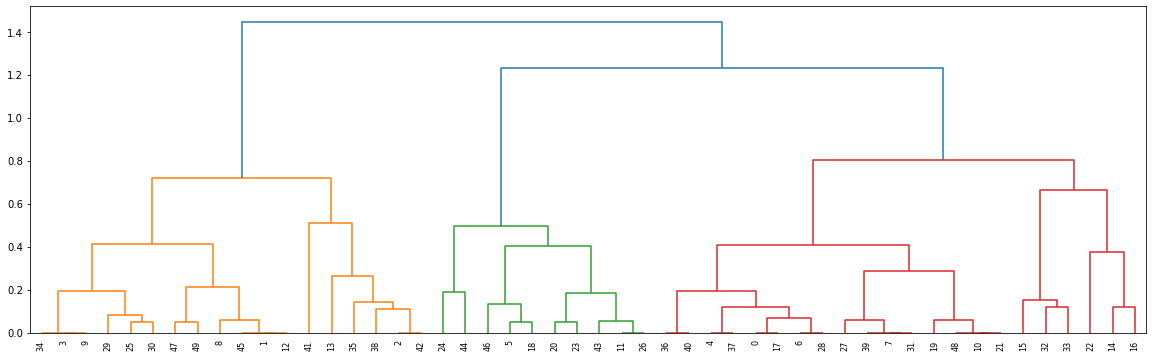

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

#绘制树状图
plt.figure(figsize=(20,6))
Z = linkage(data_M, method='ward', metric='euclidean')
p = dendrogram(Z, 0)
plt.show()

In [16]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ac.fit(data_M)

AgglomerativeClustering(n_clusters=3)

    AgglomerativeClustering(
            affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [17]:
labels = ac.fit_predict(data_M)
print(labels)

[0 1 1 1 0 2 0 0 1 1 0 2 1 1 0 0 0 0 2 0 2 0 0 2 2 1 2 0 0 1 1 0 0 0 1 1 0
 0 1 0 0 1 1 2 2 1 2 1 0 1]


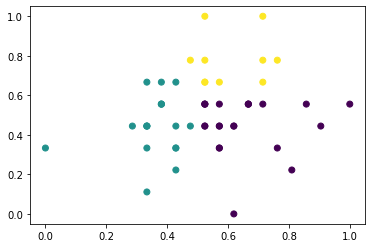

In [18]:
plt.scatter(data_M[:,0], data_M[:,1], c=labels)
plt.show()

# Spectral Clustering(谱聚类)

In [20]:
from sklearn.cluster import SpectralClustering
import  matplotlib.pyplot as plt
from sklearn import preprocessing

In [34]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(iris_data,test_size=0.3)

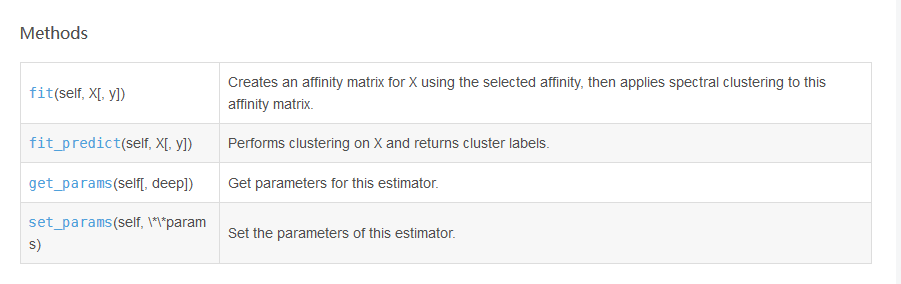

In [35]:
clustering = SpectralClustering(n_clusters=3,
                                assign_labels="discretize",
                                random_state=0)

In [38]:
clustering.fit(X_train)

SpectralClustering(assign_labels='discretize', n_clusters=3, random_state=0)

In [41]:
clustering.labels_

array([0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1], dtype=int64)

In [39]:
clustering.fit_predict(X_test)

array([0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2,
       0], dtype=int64)

### 一个实例 

In [62]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [63]:
np.random.seed(0)

random_state = None

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [64]:
# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [65]:
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_stat

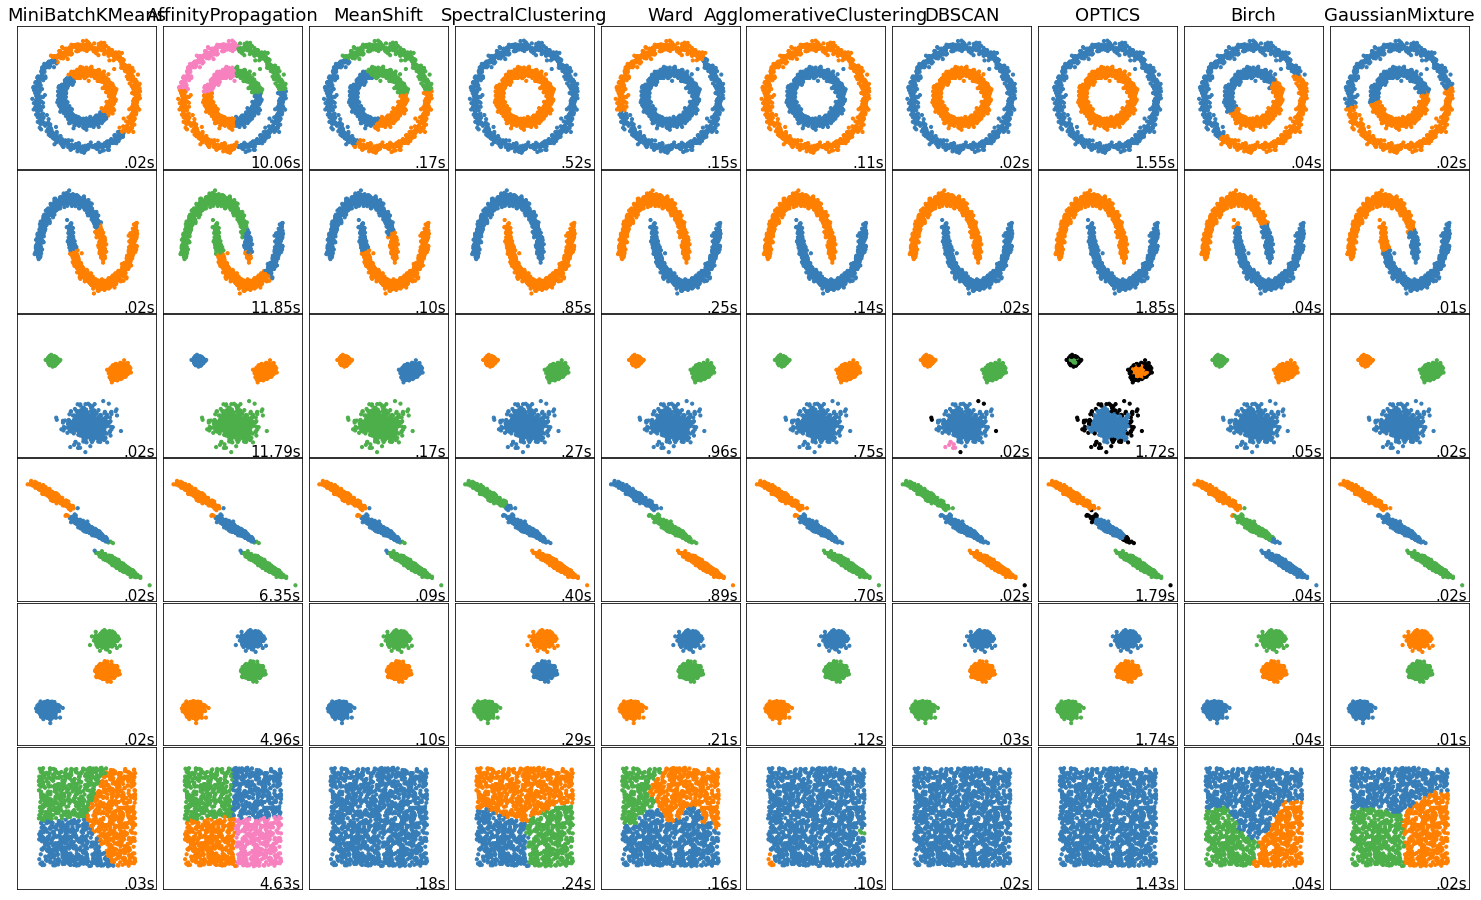

In [66]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(10 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# 密度聚类(DBSCAN)

    DBSCAN聚类的原理很简单：由密度可达关系导出最大密度相连的样本集合（聚类）。这样的一个集合中有一个或多个核心对象，如果只有一个核心对象，则簇中其他非核心对象都在这个核心对象的ε邻域内；如果是多个核心对象，那么任意一个核心对象的ε邻域内一定包含另一个核心对象（否则无法密度可达）。这些核心对象以及包含在它ε邻域内的所有样本构成一个类。

    那么，如何找到这样一个样本集合呢？一开始任意选择一个没有被标记的核心对象，找到它的所有密度可达对象，即一个簇，这些核心对象以及它们ε邻域内的点被标记为同一个类；然后再找一个未标记过的核心对象，重复上边的步骤，直到所有核心对象都被标记为止。

In [81]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=10)
        #eps 半径，控制邻域的大小，值越大，越能容忍噪声点，
        #值越小，相比形成的簇就越多
        #min_samples 原理中所说的M，控制哪个是核心点，
        #值越小，越可以容忍噪声点，越大，就更容易把有效点划分成噪声点

In [82]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(iris_data,test_size=0.3)

In [83]:
model.fit(X_train)

DBSCAN(min_samples=10)

In [84]:
y_pred = model.labels_
y_pred

array([ 1, -1,  2,  2,  0, -1,  1, -1,  0,  0,  1,  0,  0,  0,  0, -1,  0,
       -1,  0, -1, -1, -1,  1,  1, -1,  0, -1,  1,  0,  1, -1,  2, -1, -1,
        2, -1, -1, -1, -1,  2, -1,  2, -1,  2, -1,  0, -1, -1,  1,  1, -1,
        0, -1,  2,  2,  0,  0, -1,  0, -1,  0, -1,  1, -1,  0,  1,  1,  0,
       -1, -1,  0,  0,  1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  1,  1,
        2,  1,  1,  0,  2, -1,  0, -1, -1, -1, -1,  1, -1,  1, -1,  0,  0,
        0,  0, -1], dtype=int64)

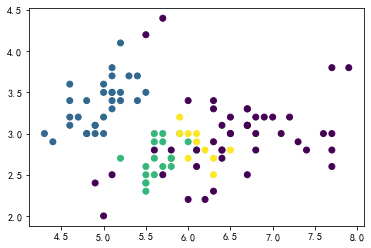

In [85]:
import matplotlib.pyplot as plt 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

## 一个实例 

In [87]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## 设置属性防止中文乱码及拦截异常信息
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [88]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data1, y1 = ds.make_blobs(N, n_features=2, 
  centers=centers, cluster_std=(1,0.75, 0.5,0.25), random_state=0)
data1 = StandardScaler().fit_transform(data1)
params1 = ((0.15, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

t = np.arange(0, 2 * np.pi, 0.1)
data2_1 = np.vstack((np.cos(t), np.sin(t))).T
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3)))
params2 = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

datasets = [(data1, y1,params1), (data2, y2,params2)]

In [89]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

类别: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] ；聚类簇数目: 16
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2] ；聚类簇数目: 3
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


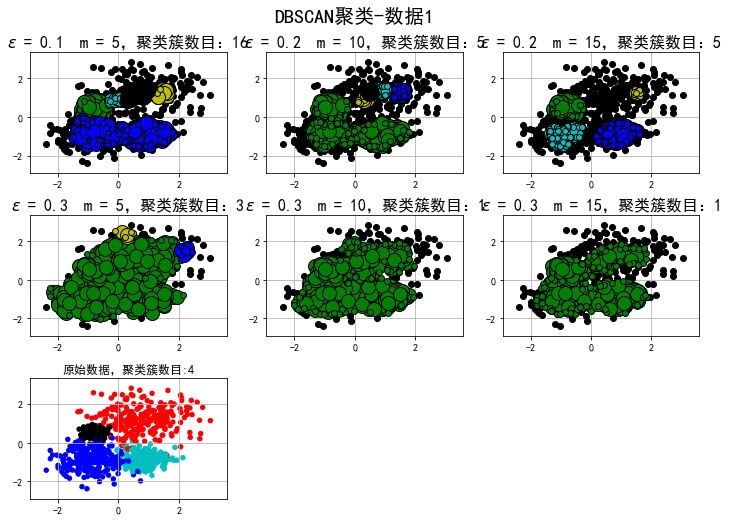

类别: [0 1 2] ；聚类簇数目: 3
类别: [-1  0  1] ；聚类簇数目: 2
类别: [-1  0] ；聚类簇数目: 1
类别: [0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


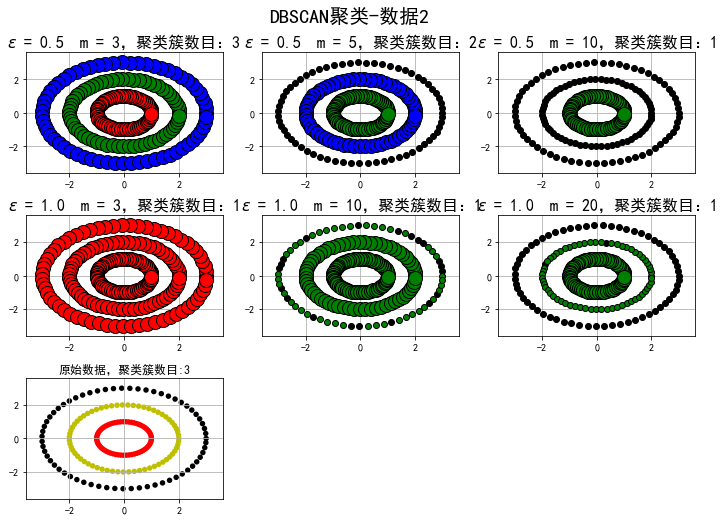

In [90]:
colors = ['r', 'g', 'b', 'y', 'c', 'k']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN聚类-数据%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35)
    
    for j,param in enumerate(params):
        eps, min_samples = param
        model = DBSCAN(eps=eps, min_samples=min_samples)
        #eps 半径，控制邻域的大小，值越大，越能容忍噪声点，
        #值越小，相比形成的簇就越多
        #min_samples 原理中所说的M，控制哪个是核心点，
        #值越小，越可以容忍噪声点，越大，就更容易把有效点划分成噪声点
        
        model.fit(X)
        y_hat = model.labels_

        unique_y_hat = np.unique(y_hat)
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        
        core_samples_mask = np.zeros_like(y_hat, dtype=bool)
        core_samples_mask[model.core_sample_indices_] = True
        
        ## 开始画图
        plt.subplot(3,3,j+1)
        for k, col in zip(unique_y_hat, colors):
            if k == -1:
                col = 'k'
                
            class_member_mask = (y_hat == k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
              markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
              markeredgecolor='k', markersize=6)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\epsilon$ = %.1f  m = %d，聚类簇数目：%d' % (eps, min_samples, 
          n_clusters), fontsize=16)
    ## 原始数据显示
    plt.subplot(3,3,7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('原始数据，聚类簇数目:%d' % len(np.unique(y)))
    plt.grid(True)
    plt.show()